In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [110]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## Data cleaning, Handling null values

In [111]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [112]:
## Get Features with null values
feat_with_null = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feat_with_null

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

## Fill null values wiht median or mode

In [113]:
# We check skewness , to decide whether to fill null values with median or mode, if data is numerical
# Mode for categorical and binary data
# median for Oridnal
# Consider checking outliers first before using mean , can visualize using box plot

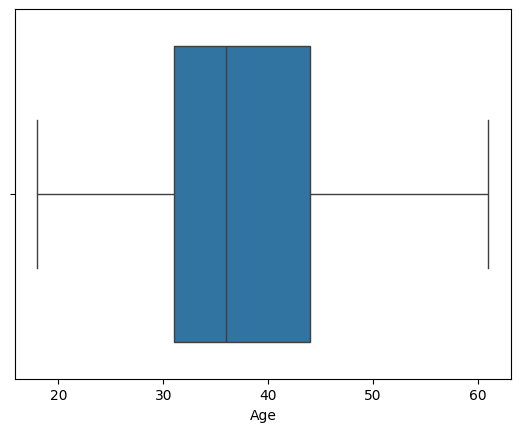

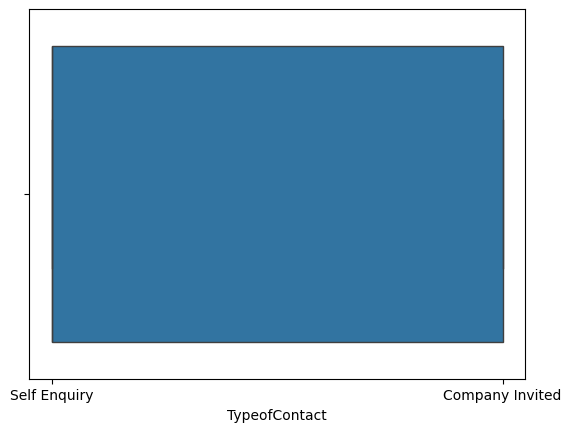

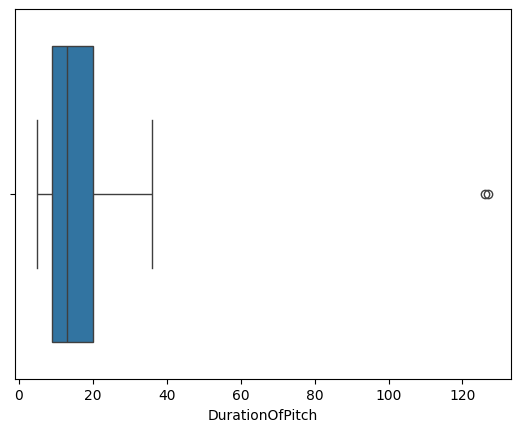

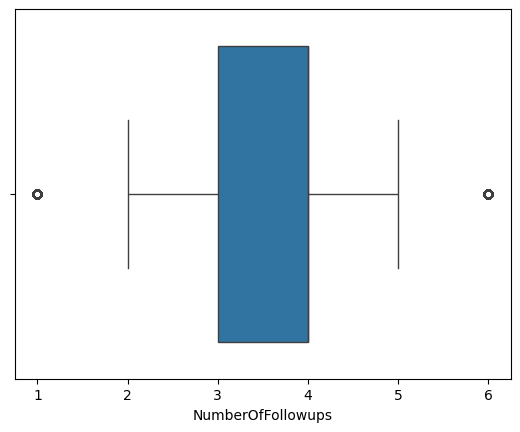

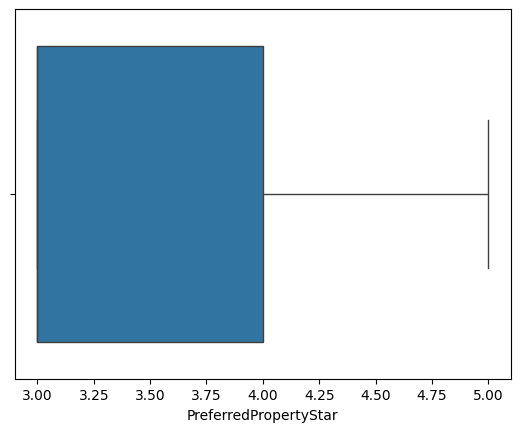

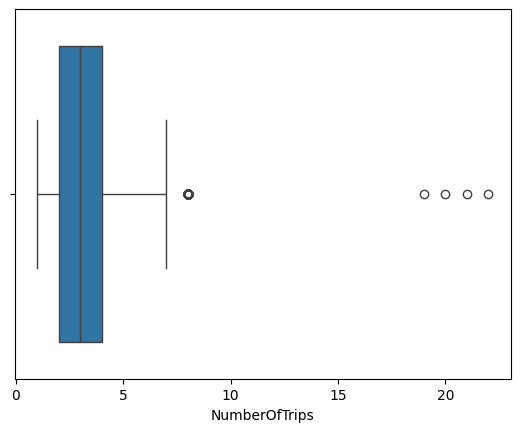

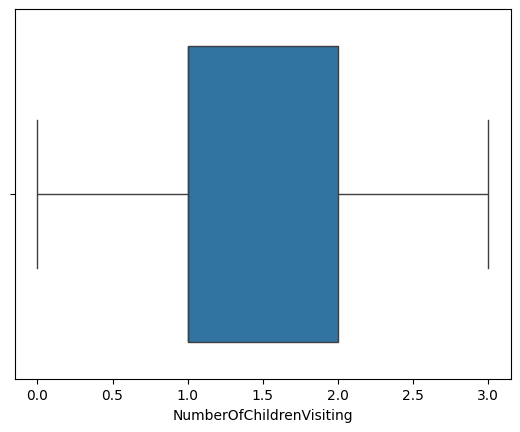

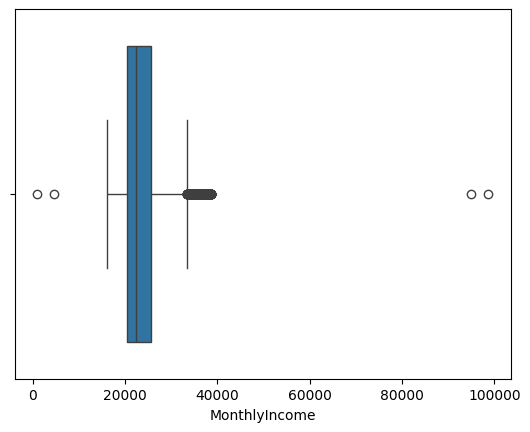

In [114]:
for column in feat_with_null:
    sns.boxplot(x=df[column])
    plt.show()
##As we can see, there are outlier in Duration Of Pitch, Numberoffollowups, NUmber of trips, monthly income

## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [115]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [116]:
# Let us divide numerical columns and categorical columns and then numerical into discrete and continuous , so we can fill null values with median or mode.
numerical_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feat = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feat

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [117]:
# Numerical Features into discrete and continuous
discrete = [feature for feature in numerical_feat if len(df[feature].unique())<= 25]
discrete

['ProdTaken',
 'CityTier',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting']

In [118]:
#continuous
continuous = [feature for feature in numerical_feat if len(df[feature].unique()) > 25]
continuous

['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']

In [119]:
##Let us drop Customer ID column as it will nto be usefull, and also merge NumberOfPersonVisiting and NumberOfChildrenVisiting

In [120]:
df.drop(['CustomerID'], axis=1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [121]:
df['PeopleVisited'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [122]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,PeopleVisited
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


## Feature Engineering

In [123]:
#Let us split our test and train data, as we are going to use pipiling 
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [124]:
#Let us divide features into categorical and numerical
cat_features = X.select_dtypes(include = "object").columns
num_features = X.select_dtypes(exclude = "object").columns

In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe = OneHotEncoder(drop="first")

In [126]:
preprocessor = ColumnTransformer([

    ("OneHotEncoder", ohe, cat_features),
    ("StandardScalar", numeric_transformer, num_features)
]
)

In [127]:
#Let us fit data in pipeline
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Lets train model : Random Classifier Model

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score,f1_score, roc_auc_score, roc_curve

In [129]:
##Efficient way to trian with various models
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # probability=True for ROC AUC
}

for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_proba = model.predict_proba(X_train)
    y_test_proba = model.predict_proba(X_test)


    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred,average='weighted')
    train_recall = recall_score(y_train, y_train_pred,average='weighted')
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr', average='weighted')

    # Testing metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

    # Print results
    print(f"\n🔍 Results for: {model_name}")
    print("Training Metrics:")
    print(f"  Accuracy     : {train_accuracy:.4f}")
    print(f"  F1 Score     : {train_f1:.4f}")
    print(f"  Precision    : {train_precision:.4f}")
    print(f"  Recall       : {train_recall:.4f}")
    print(f"  ROC AUC      : {train_roc_auc:.4f}")

    print("Testing Metrics:")
    print(f"  Accuracy     : {test_accuracy:.4f}")
    print(f"  F1 Score     : {test_f1:.4f}")
    print(f"  Precision    : {test_precision:.4f}")
    print(f"  Recall       : {test_recall:.4f}")
    print(f"  ROC AUC      : {test_roc_auc:.4f}")


🔍 Results for: RandomForest
Training Metrics:
  Accuracy     : 1.0000
  F1 Score     : 1.0000
  Precision    : 1.0000
  Recall       : 1.0000
  ROC AUC      : 1.0000
Testing Metrics:
  Accuracy     : 0.9967
  F1 Score     : 0.9967
  Precision    : 0.9968
  Recall       : 0.9967
  ROC AUC      : 1.0000

🔍 Results for: LogisticRegression
Training Metrics:
  Accuracy     : 0.9995
  F1 Score     : 0.9995
  Precision    : 0.9995
  Recall       : 0.9995
  ROC AUC      : 0.9999
Testing Metrics:
  Accuracy     : 0.9951
  F1 Score     : 0.9948
  Precision    : 0.9952
  Recall       : 0.9951
  ROC AUC      : 0.9994

🔍 Results for: DecisionTreeClassifier
Training Metrics:
  Accuracy     : 1.0000
  F1 Score     : 1.0000
  Precision    : 1.0000
  Recall       : 1.0000
  ROC AUC      : 1.0000
Testing Metrics:
  Accuracy     : 1.0000
  F1 Score     : 1.0000
  Precision    : 1.0000
  Recall       : 1.0000
  ROC AUC      : 1.0000

🔍 Results for: KNN
Training Metrics:
  Accuracy     : 0.7848
  F1 Score

## Hyperparameter Tuning : Random Forest

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Set up grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Hyperparameters:")
print(grid_search.best_params_)

print(f"✅ Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_fe

/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
103 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_c

✅ Best Hyperparameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
✅ Best Cross-Validated Accuracy: 0.9943


In [131]:
## Evaluation
best_rf = grid_search.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Accuracy
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test), multi_class='ovr'))


              precision    recall  f1-score   support

         1.0       1.00      0.69      0.82        13
         2.0       0.98      1.00      0.99       166
         3.0       1.00      1.00      1.00       273
         4.0       1.00      1.00      1.00       262
         5.0       1.00      1.00      1.00       351
         6.0       0.97      1.00      0.99        75
         7.0       1.00      0.98      0.99        82

    accuracy                           1.00      1222
   macro avg       0.99      0.95      0.97      1222
weighted avg       1.00      1.00      0.99      1222

ROC AUC: 0.9999065246632435
